In [208]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
from copy import deepcopy
dices=cv2.imread('kostki.jpg')

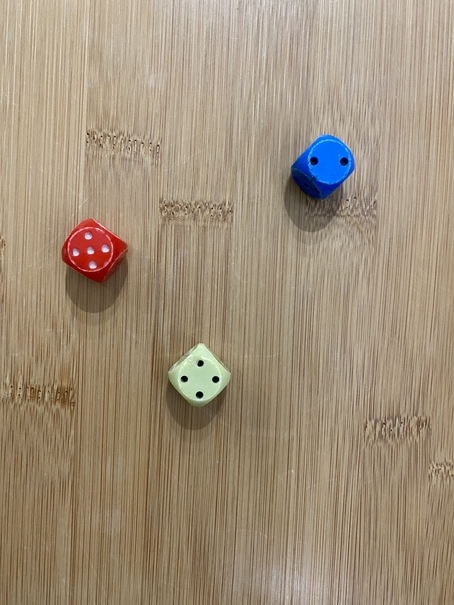

In [209]:
cv2_imshow(dices)

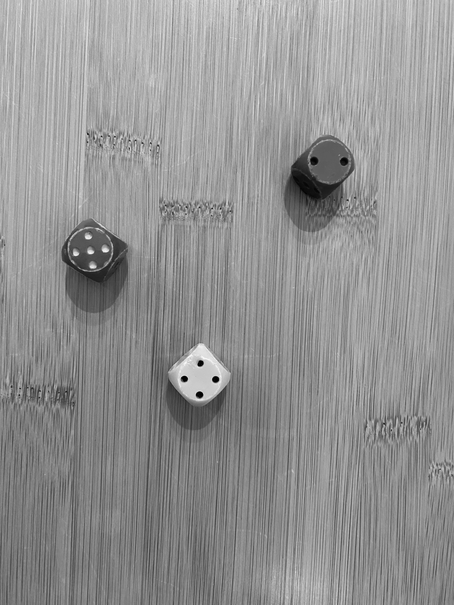

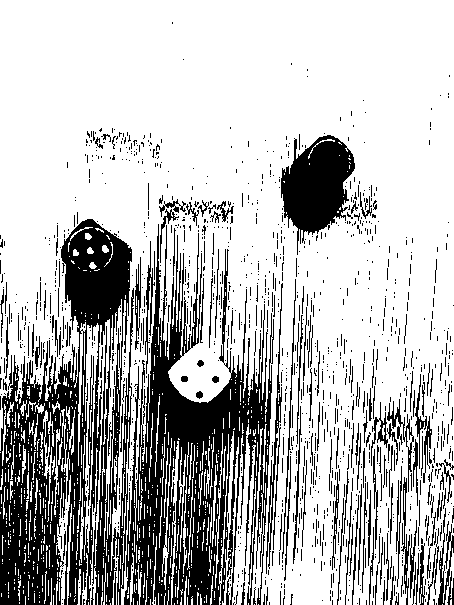

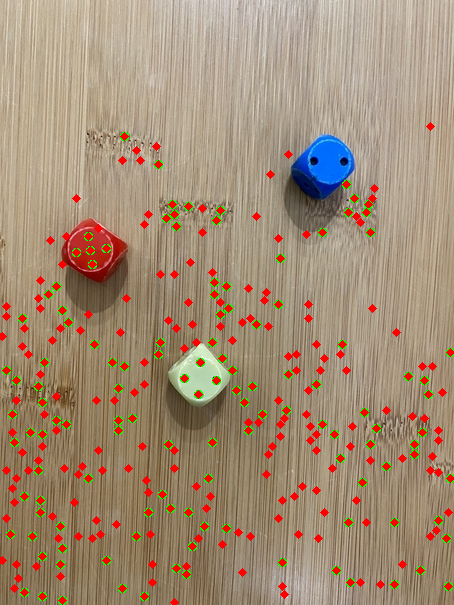

In [210]:
img=deepcopy(dices)

gray=cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
cv2_imshow(gray)
_,black_white=cv2.threshold(gray, 130, 255,cv2.THRESH_BINARY)
cv2_imshow(black_white)

circles=cv2.HoughCircles(black_white, cv2.HOUGH_GRADIENT, 1, 8, param1=15, param2=6, minRadius=1, maxRadius=4)
circles = np.uint32(np.around(circles))
for i in circles[0]:
  cv2.circle(img,(i[0],i[1]),i[2],(0,255,0),2)
  cv2.circle(img,(i[0],i[1]),2,(0,0,255),3)
cv2_imshow(img)

Znajdowanie środków kostek.

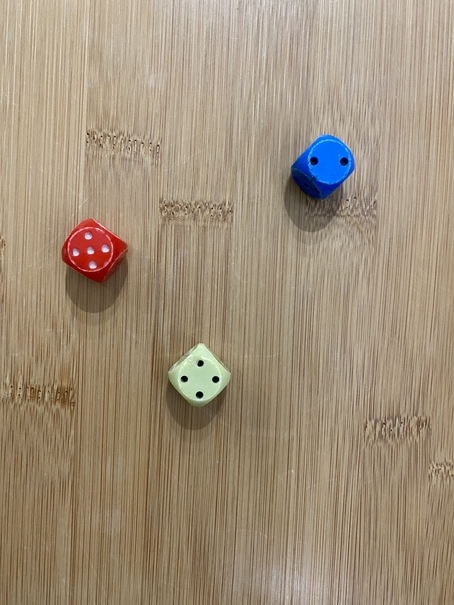

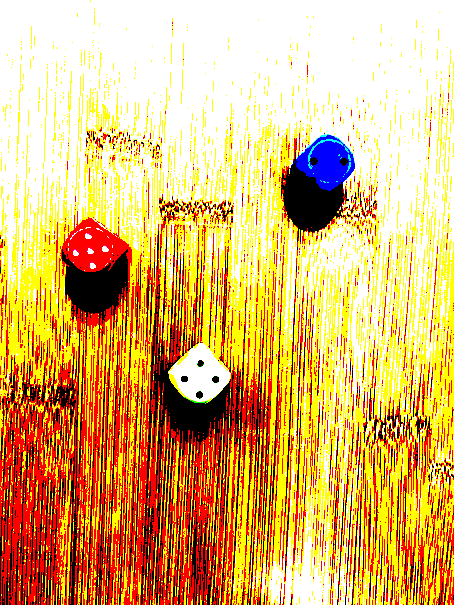

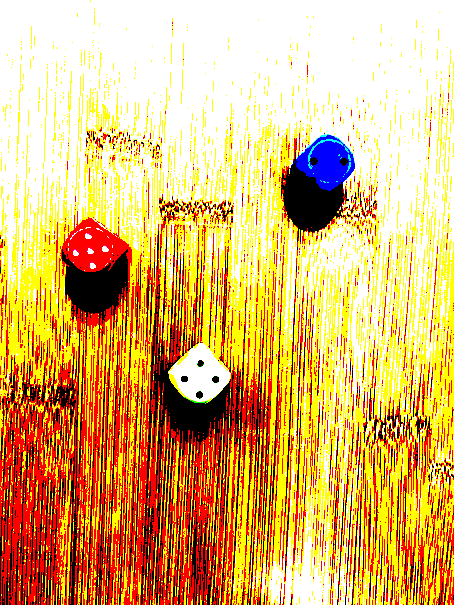

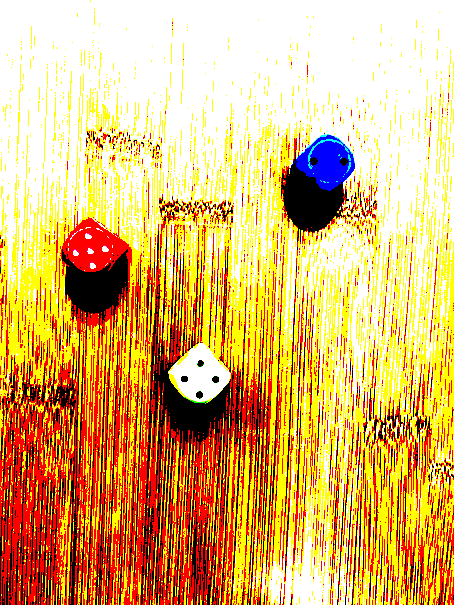

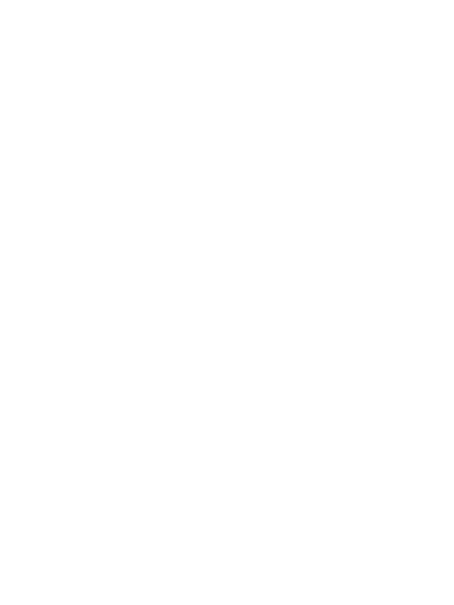

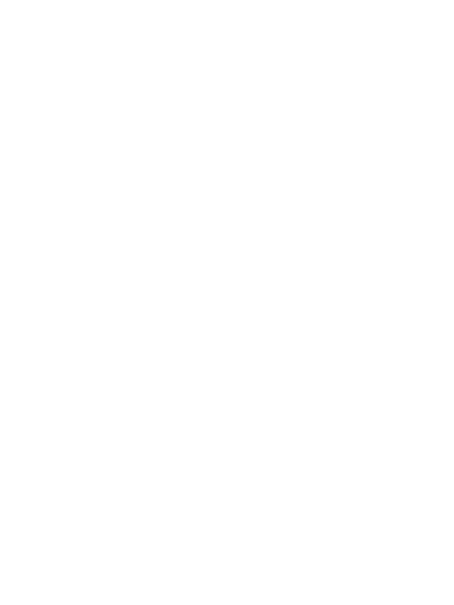

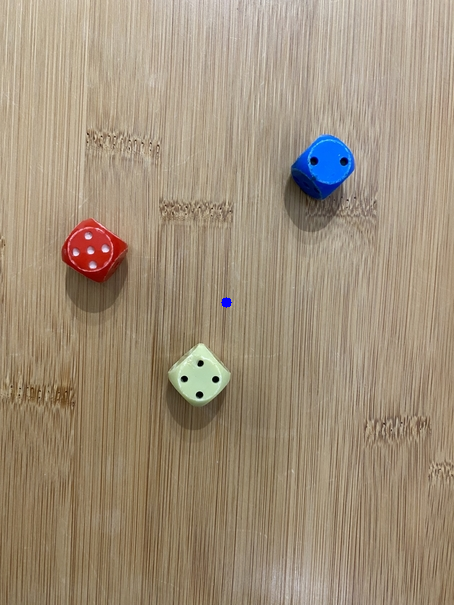

In [211]:
img=deepcopy(dices)
cv2_imshow(img)
__, th = cv2.threshold(img, 130, 255, cv2.THRESH_BINARY);
cv2_imshow(th)
ffill = th.copy()
h, w = th.shape[:2]
mask = np.zeros((h+2, w+2), np.uint8)
cv2_imshow(ffill)
cv2.floodFill(ffill, mask, (0,0), (255,255,255));
cv2_imshow(ffill)
ffill_inv = cv2.bitwise_not(ffill)
im_out = th | ffill_inv
cv2_imshow(im_out)
img2 = cv2.cvtColor(im_out, cv2.COLOR_BGR2GRAY)
cv2_imshow(img2)
contours, hierarchy = cv2.findContours(img2, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
dices_centers=[]
for c in contours:
  # calculate moments for each contour
  M = cv2.moments(c)
  # calculate x,y coordinate of center
  #cX = int(M["m10"] / M["m00"])
  #cY = int(M["m01"] / M["m00"])

  if M["m00"] != 0:
    cX = int(M["m10"] / M["m00"])
    cY = int(M["m01"] / M["m00"])
  else:
    # set values as what you need in the situation
    #cX, cY = 0, 0
    continue
  dices_centers.append(np.array((cX,cY)))
  cv2.circle(img, (cX, cY), 5, (255, 0, 0), -1)
cv2_imshow(img)

In [212]:
no_dices_dots=[0]*len(dices_centers)
for circle in circles[0]:
  circle_center=np.array((circle[0],circle[1]))
  smallest_distance=np.inf
  best_dice_idx=None
  for dice_idx, dice_center in enumerate(dices_centers):
    curr_dist=np.linalg.norm(dice_center-circle_center,ord=2)
    if curr_dist<smallest_distance:
      best_dice_idx=dice_idx
      smallest_distance=curr_dist
  no_dices_dots[best_dice_idx]+=1
print(no_dices_dots)


[302]


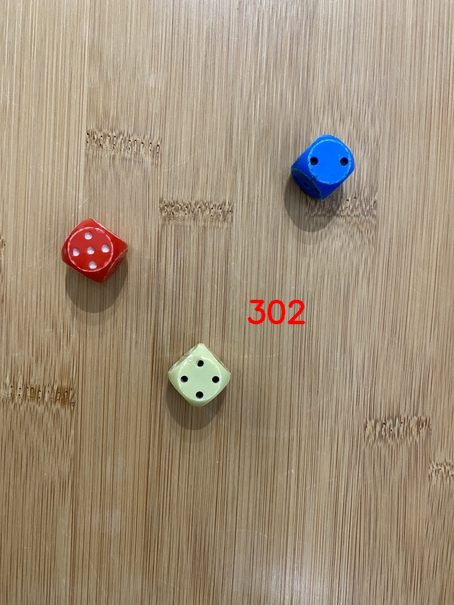

In [213]:
img=deepcopy(dices)


for no_dice_dots, dice_center in zip(no_dices_dots,dices_centers):
  image = cv2.putText(img, str(no_dice_dots), tuple(dice_center+20), cv2.FONT_HERSHEY_SIMPLEX, 
                   1, (0, 0, 255), 2, cv2.LINE_AA)
   
cv2_imshow(img)
